In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv('../data/readyforEDA.csv')




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130711 entries, 0 to 130710
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_id                    130711 non-null  int64  
 1   fifa_version                 130711 non-null  float64
 2   overall                      130711 non-null  int64  
 3   potential                    130711 non-null  int64  
 4   age                          130711 non-null  int64  
 5   height_cm                    130711 non-null  int64  
 6   weight_kg                    130711 non-null  int64  
 7   preferred_foot               130711 non-null  int64  
 8   weak_foot                    130711 non-null  int64  
 9   skill_moves                  130711 non-null  int64  
 10  pace                         130711 non-null  float64
 11  shooting                     130711 non-null  float64
 12  passing                      130711 non-null  float64
 13 

In [4]:
df["fifa_version"].value_counts()

fifa_version
22.0    17107
21.0    16815
23.0    16467
20.0    16422
24.0    16305
19.0    16057
18.0    15935
17.0    15603
Name: count, dtype: int64

In [5]:

df = df[df['improvement_3_years'] != 0]
pd.set_option('display.max_columns', None)

In [6]:
df.columns

Index(['player_id', 'fifa_version', 'overall', 'potential', 'age', 'height_cm',
       'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'attacker_position', 'midfielder_positio

In [7]:
df["fifa_version"].value_counts()

fifa_version
17.0    8889
18.0    8814
19.0    8777
20.0    8091
21.0    6887
Name: count, dtype: int64

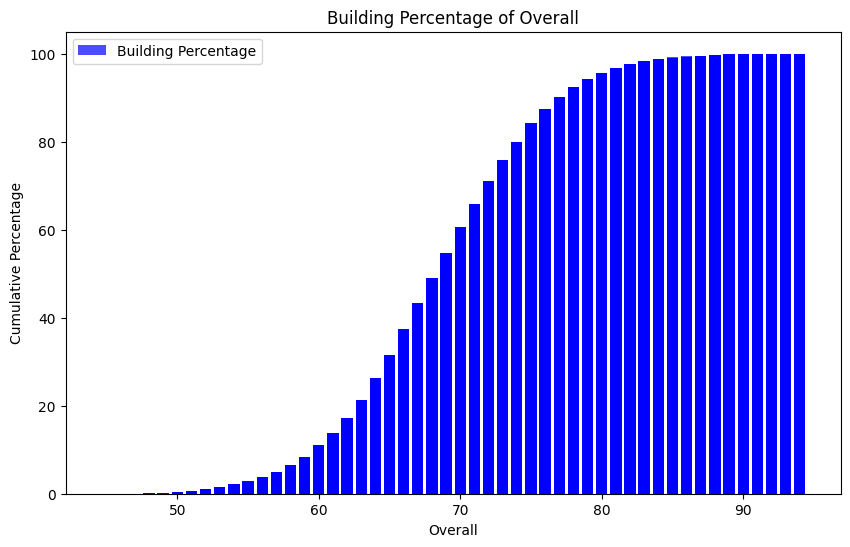

In [8]:
df['Percentage'] = df['overall'] / df['overall'].sum() * 100


df.sort_values(by='overall', inplace=True)


df['Cumulative_Percentage'] = df['Percentage'].cumsum()


plt.figure(figsize=(10, 6))
plt.bar(df['overall'], df['Cumulative_Percentage'], color='blue', alpha=0.7, label='Building Percentage')
plt.xlabel('Overall')
plt.ylabel('Cumulative Percentage')
plt.title('Building Percentage of Overall')
plt.legend()

plt.show()

In [9]:
percentile_90_value = np.percentile(df['overall'], 60)
print(f'The value at the 60th percentile is: {percentile_90_value}')


The value at the 60th percentile is: 70.0


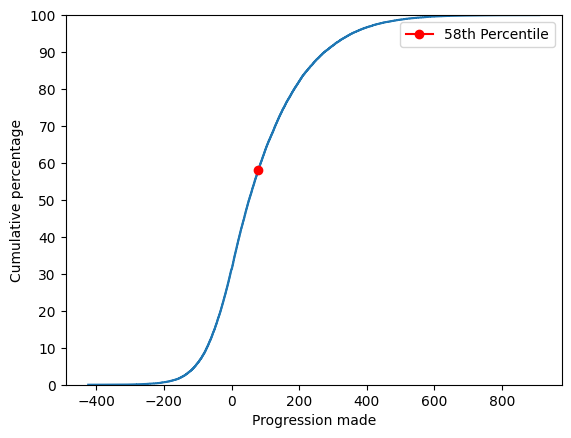

In [10]:
data = df['improvement_3_years']

data_sorted = np.sort(data)

p = 100. * np.arange(len(data)) / (len(data) - 1)

fig, ax2 = plt.subplots()
ax2.plot(data_sorted, p)
ax2.set_xlabel('Progression made')
ax2.set_ylabel('Cumulative percentage')

percent_58 = np.percentile(data_sorted, 58)
ax2.plot(percent_58, 58, marker='o', color='red', label='58th Percentile')

ax2.set_yticks(np.arange(0, 101, 10))
ax2.set_ylim(0, 100)

plt.legend()
plt.show()


In [11]:
percentile_58_value = np.percentile(data_sorted, 58)
print(f'The value at the 58th percentile is: {percentile_58_value}')

plt.show()

The value at the 58th percentile is: 79.0


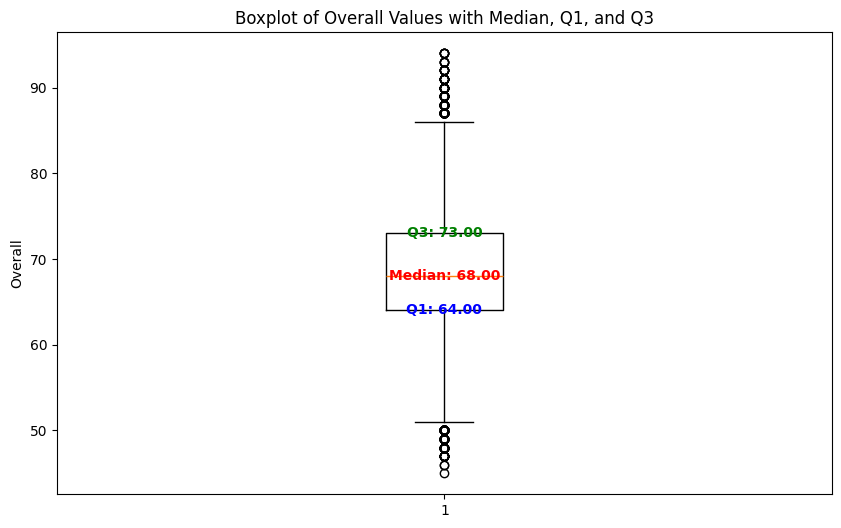

In [12]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(df['overall'], showfliers=True)

median = box['medians'][0].get_ydata()[0]
q1 = box['boxes'][0].get_ydata()[0]
q3 = box['boxes'][0].get_ydata()[2]

plt.text(1, median, f'Median: {median:.2f}', ha='center', va='center', fontweight='bold', color='red')
plt.text(1, q1, f'Q1: {q1:.2f}', ha='center', va='center', fontweight='bold', color='blue')
plt.text(1, q3, f'Q3: {q3:.2f}', ha='center', va='center', fontweight='bold', color='green')

plt.ylabel('Overall')
plt.title('Boxplot of Overall Values with Median, Q1, and Q3')
plt.show()

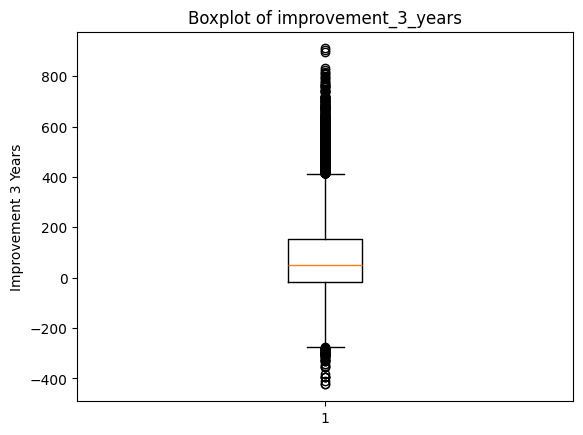

Median: 52.000
Q1: -17.000
Q3: 155.000


In [13]:
plt.boxplot(df['improvement_3_years'])
plt.title('Boxplot of improvement_3_years')
plt.ylabel('Improvement 3 Years')

plt.show()

median = df['improvement_3_years'].median()
q1 = df['improvement_3_years'].quantile(0.25)
q3 = df['improvement_3_years'].quantile(0.75)

print(f'Median: {median:.3f}')                                     
print(f'Q1: {q1:.3f}')
print(f'Q3: {q3:.3f}')

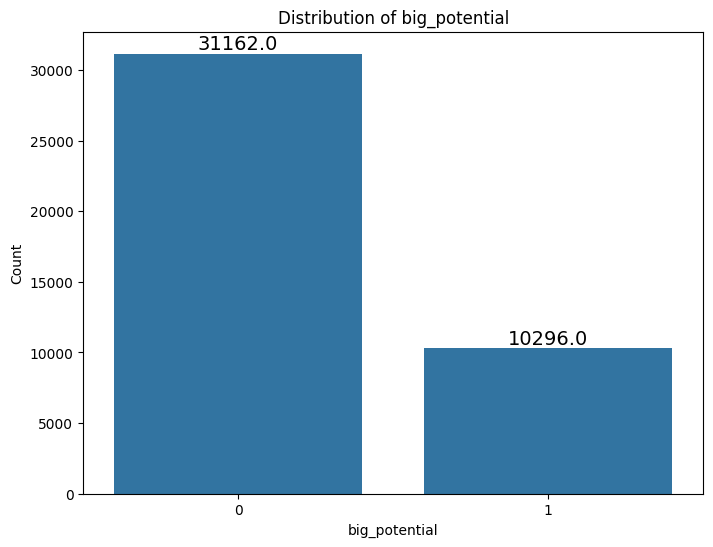

In [14]:
value_counts = df['big_potential'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='big_potential', data=df, order=value_counts.index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom',  
                fontsize=14, color='black')

plt.title('Distribution of big_potential')
plt.xlabel('big_potential')
plt.ylabel('Count')

plt.show()

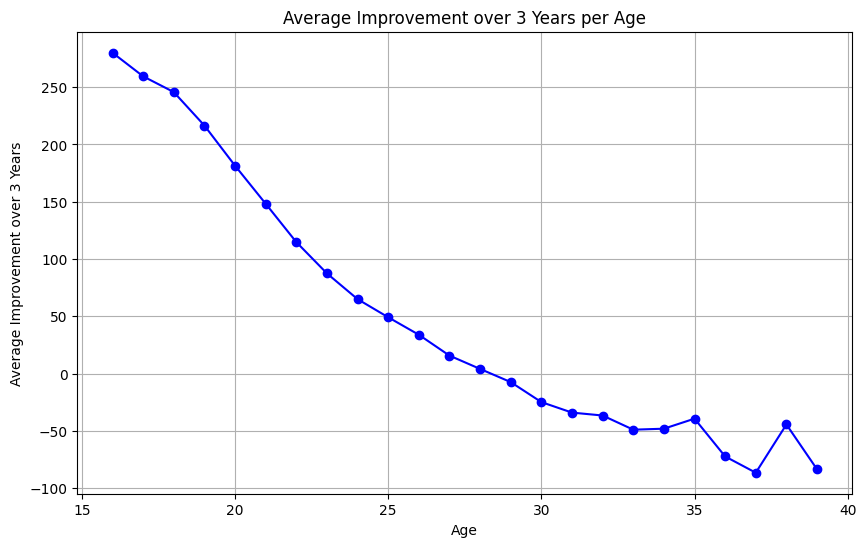

In [15]:

average_improvement = df.groupby('age')['improvement_3_years'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_improvement.index, average_improvement, marker='o', linestyle='-', color='b')

plt.title('Average Improvement over 3 Years per Age')
plt.xlabel('Age')
plt.ylabel('Average Improvement over 3 Years')

plt.grid(True)
plt.show()

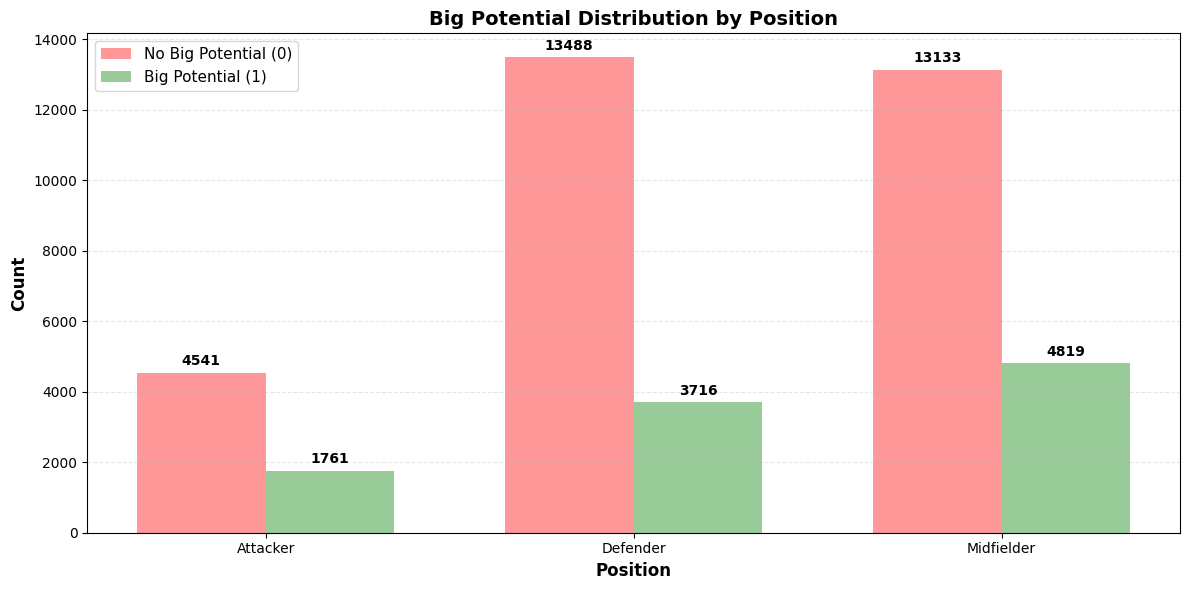


Summary Statistics:
Attacker:
  Total players: 6302
  Big Potential: 1761 (27.94%)
  No Big Potential: 4541 (72.06%)

Defender:
  Total players: 17204
  Big Potential: 3716 (21.60%)
  No Big Potential: 13488 (78.40%)

Midfielder:
  Total players: 17952
  Big Potential: 4819 (26.84%)
  No Big Potential: 13133 (73.16%)



In [16]:
# Bar chart showing big_potential for each position (attacker, midfielder, defender)

# Create position labels
df['position'] = 'None'
df.loc[df['attacker_position'] == 1, 'position'] = 'Attacker'
df.loc[df['midfielder_position'] == 1, 'position'] = 'Midfielder'
df.loc[df['defender_position'] == 1, 'position'] = 'Defender'

# Count big_potential by position
position_big_potential = df.groupby(['position', 'big_potential']).size().unstack(fill_value=0)

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot grouped bars
x = np.arange(len(position_big_potential.index))
width = 0.35

bars1 = ax.bar(x - width/2, position_big_potential[0], width, label='No Big Potential (0)', color='#ff7f7f', alpha=0.8)
bars2 = ax.bar(x + width/2, position_big_potential[1], width, label='Big Potential (1)', color='#7fbf7f', alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom',
                       fontsize=10, fontweight='bold')

ax.set_xlabel('Position', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Big Potential Distribution by Position', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(position_big_potential.index)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("="*50)
for position in position_big_potential.index:
    total = position_big_potential.loc[position].sum()
    big_pot = position_big_potential.loc[position, 1]
    percentage = (big_pot / total * 100) if total > 0 else 0
    print(f"{position}:")
    print(f"  Total players: {total}")
    print(f"  Big Potential: {big_pot} ({percentage:.2f}%)")
    print(f"  No Big Potential: {position_big_potential.loc[position, 0]} ({100-percentage:.2f}%)")
    print()


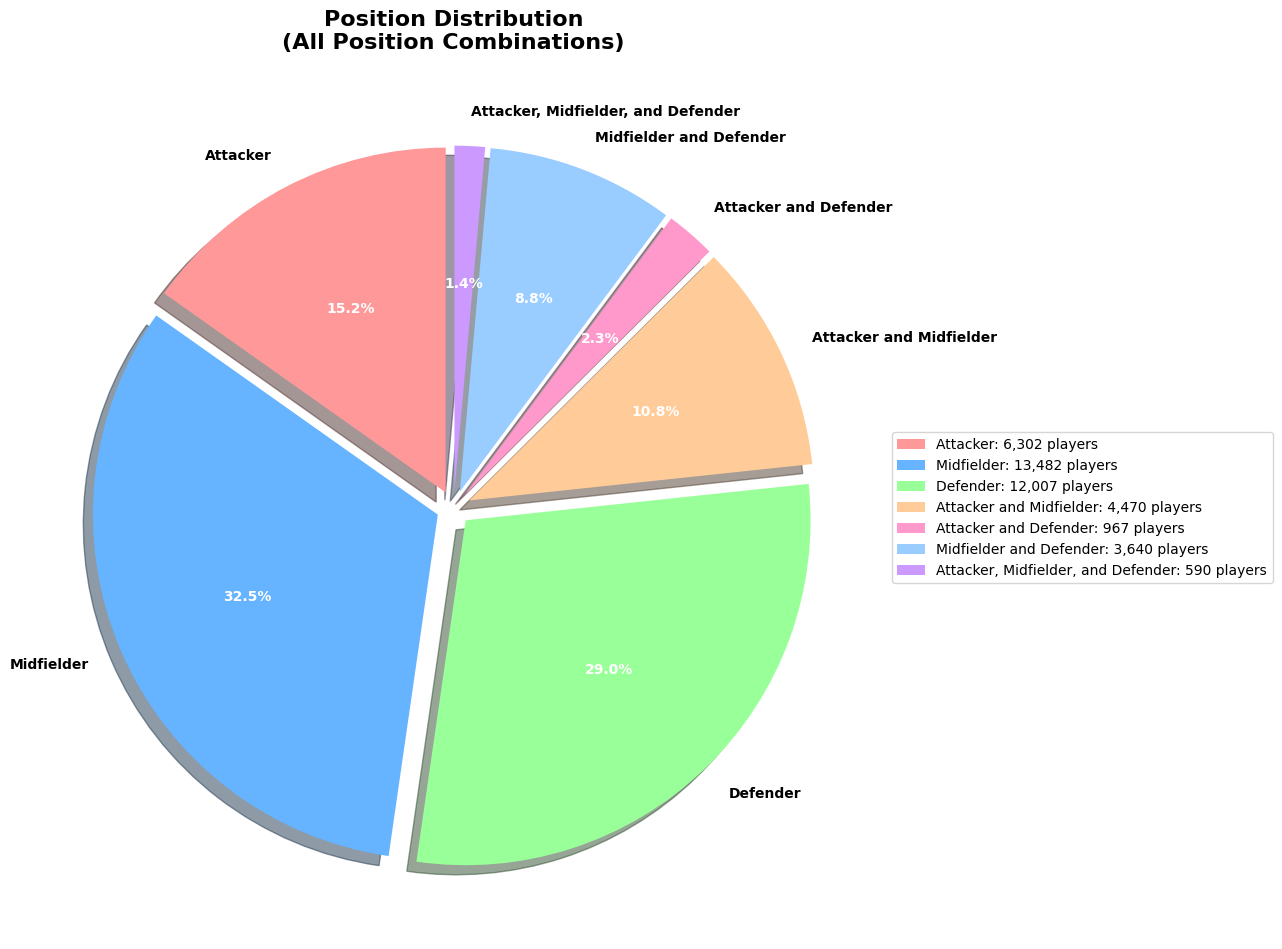


Position Distribution Statistics:
Total players in dataset: 41,458

Attacker: 6,302 players (15.20%)
Midfielder: 13,482 players (32.52%)
Defender: 12,007 players (28.96%)
Attacker and Midfielder: 4,470 players (10.78%)
Attacker and Defender: 967 players (2.33%)
Midfielder and Defender: 3,640 players (8.78%)
Attacker, Midfielder, and Defender: 590 players (1.42%)


In [17]:
# Pie chart showing position distribution with all position combinations

# Categorize players into all position combinations
def categorize_position(row):
    att = row['attacker_position'] == 1
    mid = row['midfielder_position'] == 1
    def_pos = row['defender_position'] == 1
    
    if att and mid and def_pos:
        return 'Attacker, Midfielder, and Defender'
    elif att and mid:
        return 'Attacker and Midfielder'
    elif att and def_pos:
        return 'Attacker and Defender'
    elif mid and def_pos:
        return 'Midfielder and Defender'
    elif att:
        return 'Attacker'
    elif mid:
        return 'Midfielder'
    elif def_pos:
        return 'Defender'
    else:
        return 'None'

df['position_category'] = df.apply(categorize_position, axis=1)

# Count players in each category
position_counts = df['position_category'].value_counts()

# Remove 'None' category if it exists
if 'None' in position_counts:
    position_counts = position_counts.drop('None')

# Order the categories as specified
category_order = [
    'Attacker',
    'Midfielder',
    'Defender',
    'Attacker and Midfielder',
    'Attacker and Defender',
    'Midfielder and Defender',
    'Attacker, Midfielder, and Defender'
]

# Reorder to match the specified order (only include categories that exist)
position_counts = position_counts.reindex([cat for cat in category_order if cat in position_counts.index])

# Create the pie chart
fig, ax = plt.subplots(figsize=(12, 10))

# Color scheme for all categories
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#99ccff', '#cc99ff']
explode = tuple([0.05] * len(position_counts))  # Slightly separate each slice

wedges, texts, autotexts = ax.pie(
    position_counts.values,
    labels=position_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(position_counts)],
    explode=explode,
    shadow=True,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

# Enhance the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

ax.set_title('Position Distribution\n(All Position Combinations)', 
             fontsize=16, fontweight='bold', pad=20)

# Add legend with counts
legend_labels = [f'{pos}: {count:,} players' for pos, count in position_counts.items()]
ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nPosition Distribution Statistics:")
print("="*70)
print(f"Total players in dataset: {len(df):,}\n")
for pos, count in position_counts.items():
    percentage = (count / len(df) * 100)
    print(f"{pos}: {count:,} players ({percentage:.2f}%)")


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41458 entries, 78982 to 207
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    41458 non-null  int64  
 1   fifa_version                 41458 non-null  float64
 2   overall                      41458 non-null  int64  
 3   potential                    41458 non-null  int64  
 4   age                          41458 non-null  int64  
 5   height_cm                    41458 non-null  int64  
 6   weight_kg                    41458 non-null  int64  
 7   preferred_foot               41458 non-null  int64  
 8   weak_foot                    41458 non-null  int64  
 9   skill_moves                  41458 non-null  int64  
 10  pace                         41458 non-null  float64
 11  shooting                     41458 non-null  float64
 12  passing                      41458 non-null  float64
 13  dribbling          

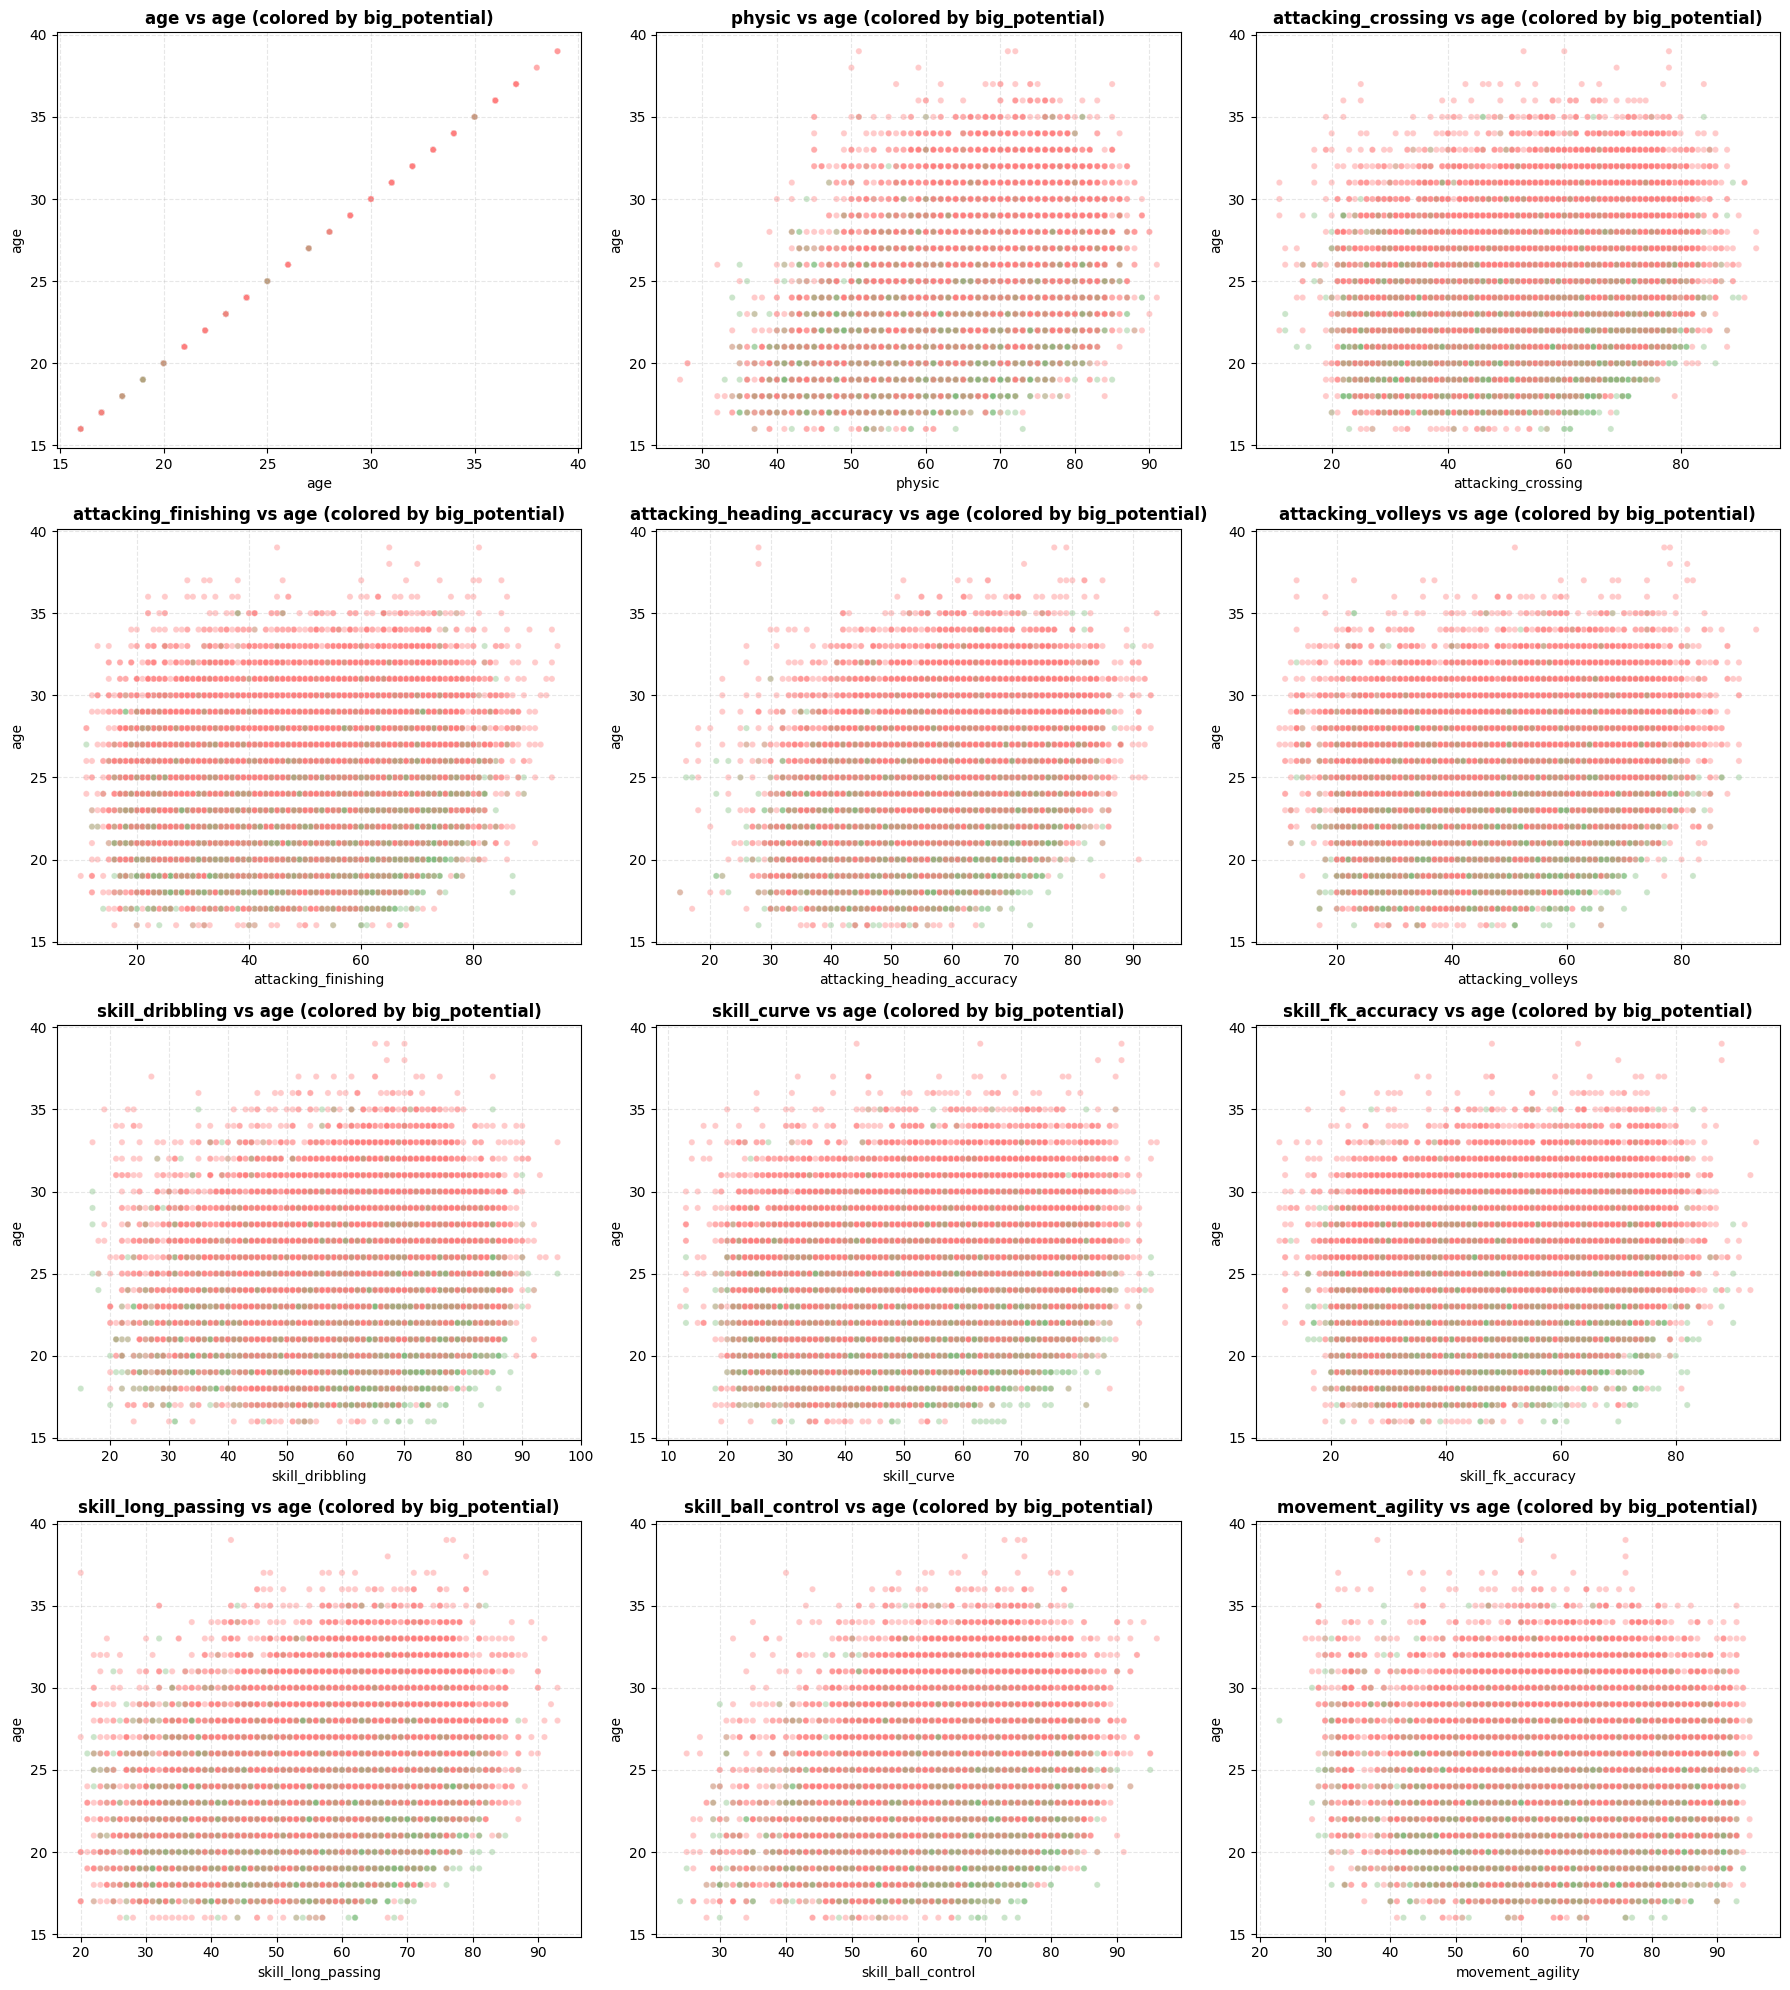

In [21]:
# Scatter plots for selected features colored by big_potential
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = [
    'age',
    'physic',
    'attacking_crossing',
    'attacking_finishing',
    'attacking_heading_accuracy',
    'attacking_volleys',
    'skill_dribbling',
    'skill_curve',
    'skill_fk_accuracy',
    'skill_long_passing',
    'skill_ball_control',
    'movement_agility'
]

# Optional down-sample for speed/clarity on large datasets
plot_df = df.sample(n=20000, random_state=42) if len(df) > 20000 else df.copy()

n_feats = len(features_to_plot)
n_cols = 3
n_rows = int(np.ceil(n_feats / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), sharey=False)
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    sns.scatterplot(
        data=plot_df,
        x=feature,
        y='age',
        hue='big_potential',
        palette={0: '#ff7f7f', 1: '#7fbf7f'},
        alpha=0.4,
        s=20,
        ax=ax,
        legend=False
    )
    ax.set_title(f'{feature} vs age (colored by big_potential)', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('age')
    ax.grid(alpha=0.3, linestyle='--')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


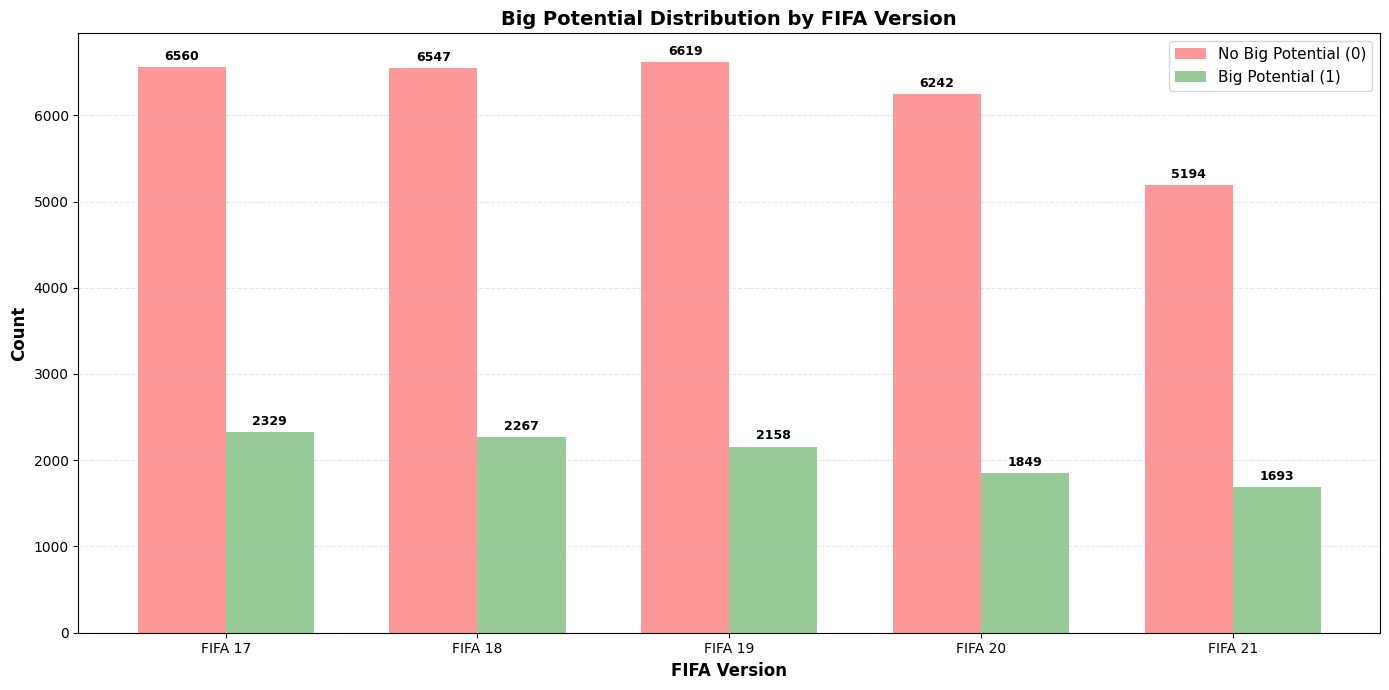


Big Potential Distribution by FIFA Version:
FIFA 17:
  Total: 8,889 | Big Potential: 2,329 (26.2%) | No Big Potential: 6,560 (73.8%)
FIFA 18:
  Total: 8,814 | Big Potential: 2,267 (25.7%) | No Big Potential: 6,547 (74.3%)
FIFA 19:
  Total: 8,777 | Big Potential: 2,158 (24.6%) | No Big Potential: 6,619 (75.4%)
FIFA 20:
  Total: 8,091 | Big Potential: 1,849 (22.9%) | No Big Potential: 6,242 (77.1%)
FIFA 21:
  Total: 6,887 | Big Potential: 1,693 (24.6%) | No Big Potential: 5,194 (75.4%)

Total samples: 41,458


In [20]:
# Bar chart showing big_potential distribution for each FIFA version

# Group by fifa_version and big_potential
fifa_big_potential = df.groupby(['fifa_version', 'big_potential']).size().unstack(fill_value=0)

# Sort by FIFA version
fifa_big_potential = fifa_big_potential.sort_index()

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 7))

# Plot grouped bars
x = np.arange(len(fifa_big_potential.index))
width = 0.35

bars1 = ax.bar(x - width/2, fifa_big_potential[0], width, label='No Big Potential (0)', color='#ff7f7f', alpha=0.8)
bars2 = ax.bar(x + width/2, fifa_big_potential[1], width, label='Big Potential (1)', color='#7fbf7f', alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom',
                       fontsize=9, fontweight='bold')

ax.set_xlabel('FIFA Version', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Big Potential Distribution by FIFA Version', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'FIFA {int(v)}' for v in fifa_big_potential.index])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nBig Potential Distribution by FIFA Version:")
print("="*70)
for version in fifa_big_potential.index:
    total = fifa_big_potential.loc[version].sum()
    big_pot = fifa_big_potential.loc[version, 1]
    no_big_pot = fifa_big_potential.loc[version, 0]
    percentage = (big_pot / total * 100) if total > 0 else 0
    print(f"FIFA {int(version)}:")
    print(f"  Total: {total:,} | Big Potential: {big_pot:,} ({percentage:.1f}%) | No Big Potential: {no_big_pot:,} ({100-percentage:.1f}%)")
print(f"\nTotal samples: {len(df):,}")
